In [1]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
#Read images
CH2 = Image.open('CH2.tif')
CH3 = Image.open('CH3.tif')

In [4]:
#Converts images to array
CH2_arr = np.array(CH2)
CH3_arr = np.array(CH3)

In [5]:
#Normalisation CH2 / conversion to uint8
CH2_norm = ((CH2_arr / CH2_arr.max()) *255)
CH2_normcv = np.uint8(CH2_norm)

In [6]:
#Histogram equalisation of CH2
CH2_eqhist= cv2.equalizeHist(CH2_normcv)

In [7]:
#form a difference image (in int32 form)
diff = np.clip(( (CH3_arr.astype('int32')) - CH2_arr.astype('int32')), 0, CH3_arr.max())

In [8]:
#Normalisation of difference image /  conversion to uint8
diff = ((diff / diff.max()) *255)
diff = np.uint8(diff)

In [9]:
#histogram equalisation of difference image
diff_eqhist = cv2.equalizeHist(diff)

In [10]:
#colourmap for CH2
cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ["hotpink", "pink","pink", "pink","white"])

#colourmap for CH3
cmap3 = mpl.colors.LinearSegmentedColormap.from_list("", ["indigo","rebeccapurple","purple","mediumorchid","thistle","white","white"])                                                 

In [11]:
#Creates an inverse image for proteins
diff_inverse = cv2.bitwise_not(diff_eqhist)

#Creates an inverse image for lipids
CH2_inverse = cv2.bitwise_not(CH2_eqhist)

In [12]:
#coloured protein signal
diff_coloured = cmap3(diff_inverse)

#coloured lipid signal
CH2_coloured = cmap2(CH2_inverse)

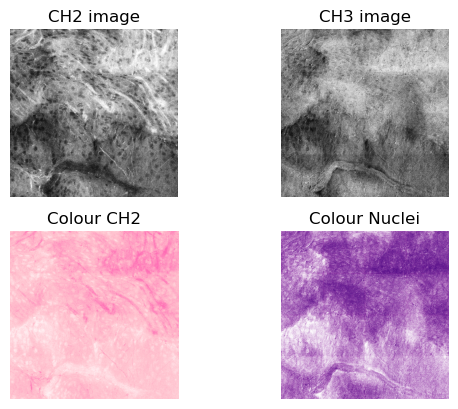

In [13]:
plt.subplot(2,2,1)
plt.imshow(CH2_eqhist,cmap='gray')
plt.axis('off')
plt.title('CH2 image')

plt.subplot(2,2,2)
plt.imshow(diff_eqhist,cmap='gray')
plt.axis('off')
plt.title('CH3 image')

plt.subplot(2,2,3)
plt.imshow(CH2_coloured)
plt.axis('off')
plt.title('Colour CH2')

plt.subplot(2,2,4)
plt.imshow(diff_coloured)
plt.axis('off')
plt.title('Colour Nuclei')

plt.show()

In [14]:
#Create array for final image
Combined = CH2_coloured.copy()

In [15]:
#Get array size of colour space image (for loops)
X, Y, Z = CH2_coloured.shape

In [16]:
#Loop for combining images
for i in range(X):
    for j in range(Y):
        for k in range(Z):
            #Blending of the two coloured images when: a) there is a protein signal 
                                                    #AND b) the CH2 signal is weak
            if ((diff_inverse[i,j]) < 220) and (CH2_inverse[i,j] < 50): #These are the numbers you want to be changing
               Combined[i,j,k] = (((diff_coloured[i,j,k]) + CH2_coloured[i,j,k])/2)
               
            #Direct use of protein signal when it is strong   
            if diff_inverse[i,j] < 50: #And can change this, lower means only including the strongest signal of the difference image
                Combined[i,j,k] = (diff_coloured[i,j,k])


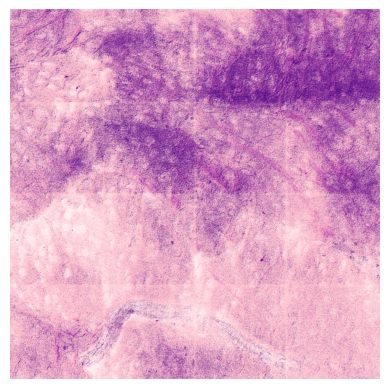

In [17]:
plt.imshow(Combined)
plt.axis('off')
plt.savefig('Final.jpg', bbox_inches='tight')
plt.show()